# Introduction to Data Analysis
# Supervised Learning
# Simple Linear regression
# Multiple Linear Regression
# Introduction to Sentiment Alalysis

In [1]:
# Import libraries
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Educational library
import graphlab as gl

## Analysing people's (just for implements simple commands in pandas)

In [3]:
# Import our datas using pandas
people = pd.read_csv('people-example.csv')

In [4]:
# show the first datas
people.head()

,First Name,Last Name,Country,age
0,Bob,Smith,United States,24
1,Alice,Williams,Canada,23
2,Malcolm,Jone,England,22
3,Felix,Brown,USA,23
4,Alex,Cooper,Poland,23


In [8]:
# List the last elements
people.tail()

,First Name,Last Name,Country,age
2,Malcolm,Jone,England,22
3,Felix,Brown,USA,23
4,Alex,Cooper,Poland,23
5,Tod,Campbell,United States,22
6,Derek,Ward,Switzerland,25


In [9]:
# Show important information of our datas
people.describe()

,age
count,7.000000
mean,23.142857
std,1.069045
min,22.000000
25%,22.500000
50%,23.000000
75%,23.500000
max,25.000000


In [11]:
# function for change value of our column "Country"
def change_country(value):
    if value == 'USA':
        return 'United States'
    else:
        return value

In [12]:
# applying function for value of our column "Country"
people['Country'] = people['Country'].apply(change_country)

In [13]:
# Other way to call our data
pd.DataFrame(people)

,First Name,Last Name,Country,age
0,Bob,Smith,United States,24
1,Alice,Williams,Canada,23
2,Malcolm,Jone,England,22
3,Felix,Brown,United States,23
4,Alex,Cooper,Poland,23
5,Tod,Campbell,United States,22
6,Derek,Ward,Switzerland,25


In [15]:
# Count value of one column
people['age'].count()

7

In [17]:
# Count occurrence of numerical values
people['age'].value_counts()

23    3
22    2
25    1
24    1
dtype: int64

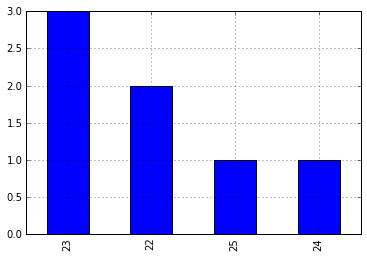

In [18]:
# Plotting simple chart for best visualizer our data 
people['age'].value_counts().plot(kind='bar')

# Exploring the data for houses sales

In [24]:
houses = pd.read_csv('home_data.csv')
# I've been using GraphLab for make our prediction (I don't know how make this using scikit-learn XD)
houses_gl = gl.SFrame('home_data.gl/')

In [22]:
# show columns of our dataset
houses.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


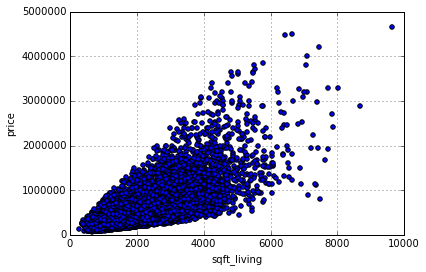

In [30]:
# make a simple scatter plot (using pandas) for price based on sqft_living (square footage)
houses.plot(kind='scatter', x='sqft_living', y='price', xlim=(0, 10000), ylim=(0, 5000000))

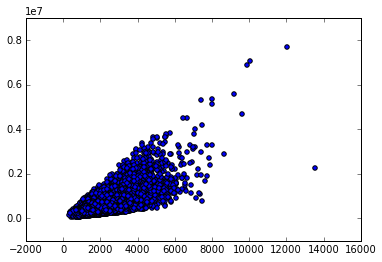

In [34]:
# The same graph above, but using matplotlib
plt.scatter(houses['sqft_living'], houses['price'])

In [37]:
# fit our data in Trainning_data and Test_erro using numpy(First create a mask and getting 80% of our dataset)
mask = np.random.rand(len(houses)) < 0.8 

In [40]:
train_data = houses[mask]
len(train_data)

17296

In [41]:
test_err = houses[~mask]
len(test_err)

4317

In [53]:
len(houses)

21613

In [100]:
# Simple linear regression
# Create our regression model (I'll use GraphLab beacause at the moment I don't know how to use sciki-learn)
simple_model = gl.linear_regression.create(gl.SFrame(train_data), target='price', features=['sqft_living'],
                                          validation_set=None)

PROGRESS: Linear regression:
PROGRESS: --------------------------------------------------------
PROGRESS: Number of examples          : 17296
PROGRESS: Number of features          : 1
PROGRESS: Number of unpacked features : 1
PROGRESS: Number of coefficients    : 2
PROGRESS: Starting Newton Method
PROGRESS: --------------------------------------------------------
PROGRESS: +-----------+----------+--------------+--------------------+---------------+
PROGRESS: | Iteration | Passes   | Elapsed Time | Training-max_error | Training-rmse |
PROGRESS: +-----------+----------+--------------+--------------------+---------------+
PROGRESS: | 1         | 2        | 0.004932     | 4169611.937654     | 258841.739298 |
PROGRESS: +-----------+----------+--------------+--------------------+---------------+


In [77]:
# RMSE
print('Mean of price: {}'.format(train_data['price'].mean()))
print('Mean of sqft_living: {}'.format(train_data['sqft_living'].mean()))
print('Prediction: ')
simple_model.evaluate(gl.SFrame(train_data))

Mean of price: 537808.369565
Mean of sqft_living: 2074.88876041
Prediction: 


{'max_error': 4169611.9376542196, 'rmse': 258841.73929756336}

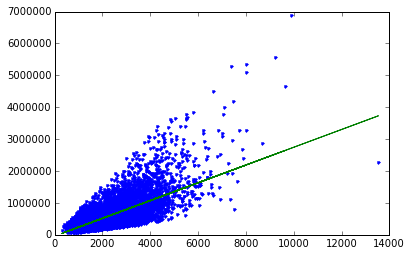

In [83]:
# Let's show our prediction (fitting linear regression using matplotlib)
plt.plot(train_data['sqft_living'], train_data['price'],'.',
         train_data['sqft_living'], simple_model.predict(gl.SFrame(train_data)), '-')

In [84]:
# Let's add more features for make our prediction
features = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors','zipcode']

In [97]:
# Multiple Linear regression
# make our prediction using theses news features
advance_model = gl.linear_regression.create(gl.SFrame(train_data), target='price', features=features,
                                           validation_set=None)

PROGRESS: Linear regression:
PROGRESS: --------------------------------------------------------
PROGRESS: Number of examples          : 17296
PROGRESS: Number of features          : 6
PROGRESS: Number of unpacked features : 6
PROGRESS: Number of coefficients    : 7
PROGRESS: Starting Newton Method
PROGRESS: --------------------------------------------------------
PROGRESS: +-----------+----------+--------------+--------------------+---------------+
PROGRESS: | Iteration | Passes   | Elapsed Time | Training-max_error | Training-rmse |
PROGRESS: +-----------+----------+--------------+--------------------+---------------+
PROGRESS: | 1         | 2        | 0.017411     | 4015148.738807     | 253999.708155 |
PROGRESS: +-----------+----------+--------------+--------------------+---------------+


In [98]:
print('Mean of price: {}'.format(train_data['price'].mean()))
print('Mean of sqft_living: {}'.format(train_data['sqft_living'].mean()))
print('Prediction: ')
advance_model.evaluate(gl.SFrame(train_data))

Mean of price: 537808.369565
Mean of sqft_living: 2074.88876041
Prediction: 


{'max_error': 4015148.7388070375, 'rmse': 253999.70815463085}

# Predictiong houses prices

In [114]:
# Getting one aleatory house
house1 = houses[houses['id'] == 5309101200]

In [115]:
# Printing price's house
house1['price']

1054    620000
Name: price, dtype: int64

In [119]:
# Simple linear regression
# Predicting price's house with one INDEPENDENT variable (sqft_living)
simple_model.predict(gl.SFrame(house1))

dtype: float
Rows: 1
[628396.4125921313]

In [118]:
# Multiple linear regression
# Predictiong price's hosue with two or more INDEPENDENT variable (sqft_living, zipcode, etc...)
advance_model.predict(gl.SFrame(house1))

dtype: float
Rows: 1
[615252.7448133267]

# Getting start with sentiment analysis

In [126]:
product = pd.read_csv('amazon_baby.csv')
product_gl = gl.SFrame('amazon_baby.gl/')
gl.canvas.set_target('ipynb')

In [122]:
product.head()

,name,review,rating
0,Planetwise Flannel Wipes,"These flannel wipes are OK, but in my opinion ...",3
1,Planetwise Wipe Pouch,it came early and was not disappointed. i love...,5
2,Annas Dream Full Quilt with 2 Shams,Very soft and comfortable and warmer than it l...,5
3,Stop Pacifier Sucking without tears with Thumb...,This is a product well worth the purchase. I ...,5
4,Stop Pacifier Sucking without tears with Thumb...,All of my kids have cried non-stop when I trie...,5


In [131]:
# Building a word vector using graphLab (I don't know how to do it using pandas/scikit-learn)
product_gl['word_count'] = gl.text_analytics.count_words(product_gl['review'])

In [134]:
product_gl.head(3)

name,review,rating,word_count
Planetwise Flannel Wipes,"These flannel wipes areOK, but in my opinion ...",3.0,"{'and': 5, 'stink': 1,'because': 1, 'ordered': ..."
Planetwise Wipe Pouch,it came early and was notdisappointed. i love ...,5.0,"{'and': 3, 'love': 1,'it': 2, 'highly': 1, ..."
Annas Dream Full Quiltwith 2 Shams ...,Very soft and comfortableand warmer than it ...,5.0,"{'and': 2, 'quilt': 1,'it': 1, 'comfortable': ..."


In [137]:
# Visualize what product has more comment
# we can see "Vulli Sophie the Giraffe Teether" has 785 reviews
product['name'].describe()

count                               183213
unique                               32417
top       Vulli Sophie the Giraffe Teether
freq                                   785
dtype: object

In [138]:
# Analysing reviews for "Vulli Sophie the Giraffe Teether"
giraffe = product[product['name'] == "Vulli Sophie the Giraffe Teether"]

In [139]:
giraffe.head()

,name,review,rating
34313,Vulli Sophie the Giraffe Teether,He likes chewing on all the parts especially t...,5
34314,Vulli Sophie the Giraffe Teether,My son loves this toy and fits great in the di...,5
34315,Vulli Sophie the Giraffe Teether,There really should be a large warning on the ...,1
34316,Vulli Sophie the Giraffe Teether,All the moms in my moms\' group got Sophie for...,5
34317,Vulli Sophie the Giraffe Teether,I was a little skeptical on whether Sophie was...,5


In [140]:
# Let's see reviews for this product "Vulli Sophie the Giraffe Teether"
# I can see down the average of rating reviews for this product
giraffe['rating'].value_counts()

5    535
4     95
3     62
1     56
2     37
dtype: int64

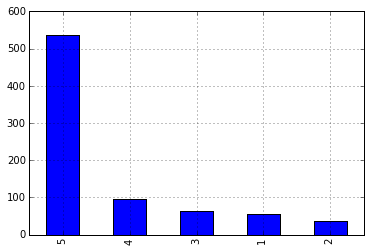

In [141]:
# Let's show this value above a pretty good using a graph
giraffe['rating'].value_counts().plot(kind='bar')